# ----------------- Kurzeinführung in die Datenanlyse mit R -----------------

Dies ist eine kurze Einführung in R für (Noch-)Nichtprogrammierer zum Einlesen, Analysieren und Darstellen tabellarischer Daten. Das Ziel ist nicht, Euch zu perfekten R ProgrammiererInnen zu machen, sondern durch Aufzeigen einiger paraktischer und einfacher Funktionen die Verwendung von Programmiersprachen/Entwicklungsumgebungen schmackhaft zu machen und etwas "die Angst" zu nehmen diese zu verwenden!

Neben der hier dargestellten Funktionalität könnt Ihr sehr einfach weitere Informationen zum Arbeiten mit R im Internet finden, z.B. durch Verwendung der Google Suchfunktion und den Ergebnissen auf der Seite stackoverflow.com - einfach mal ausprobieren.

----------------------------------------------
Anbei einige Infos zum grundlegenden Ablauf:
----------------------------------------------

1) Wir verwenden heute die Skriptsprache R die auch webbasiert in Form eines Jupyter-Notebooks verwendet werden kann.

2) Die verwendeten Daten müssen in den Arbeitsbereich geladen werden (File -> Open -> Upload), Euer eigenes "Notebook" müsst Ihr immer wieder einmal herunterladen (File -> Download as -> Notebook), man kann dieses nicht online speichern!

3) In den Beispielen hier wird ein "Notebook" durch Hinzufügen von Zeilen erweitert, deren Typ als "Code" oder "Markdown" definiert werden sollte (siehe Drop Down Menü oben). Code Tellen enthalten ausführbaren Quellcode, Markdown Zellen enthalten beschreibende Information (Überschriften, Erklärungen etc.).

4) Eine Überschrift erster Hierarchie kann man in einer Markdown Zelle durch Stellen von "#" an den Zeilenbegin erzeugen, für die nächste Hierarchiestufe verwendet man "##".

5) Ausgeführt werden die Zellen über "Cell" --> "Run Cells" oder "Run All" bzw. für eine Zeile mit "Enter + Str"!

6) Auch innerhalb einer Code Zelle kann man Bereiche auskommentieren, indem man ein "#" an den Zeilenafang schreibt - diese Zeile im Code wird dann nicht ausgeführt bzw. berücksichtigt!

7) Das Notebook wird bei Ausführen von "Run all" Zeile für Zeile ausgeführt, die Ergebnisse der Berechnungen sind dann im Speicher! Ich kann also nicht zu Begin nur die 10te Zeile ausführen, da die Zwischenergebnisse der Zeilen 1-9 noch nicht bekannt sind. Ist einmal alles ausgeführt worden, kann ich aber einzelne Zeilen verändern und dann neu ausführen!

## Grundlegendes

In der Programmierung arbeitet man mit "Variablen" die durch "Operationen" miteinander verarbeitet werden. So kann man einer frei zu definierenden Variablen einen Wert zuweisen und diese Variable dann mit einer anderen verrechnen. Die Wertzuweisung erfolg in R durch "<-" oder "=".

In [2]:
apples = 11
oranges = 44
fruits = apples + oranges
1 = pampelmuse

ERROR: Error in 1 = pampelmuse: invalid (do_set) left-hand side to assignment


Schreiben wir den Namen der Variablen aus und führen die Zeile aus wird der Wert der Variable ausgegeben.

In [3]:
fruits

[1] 55

Wir können uns die Art einer Variable durch "class()" anzeigen lassen. 

In diesem Fall ist es eine Variable vom Typ "numeric", also eine Zahl. Neben Zahlen gibt es zum Beispiel noch Character Variablen, diese enthalten eine Zeichenfolge. "15" könnte also sowhol eine numerische Variable sein, aber auch eine Zeichenfolge - mit Zeichenfolgen kann man aber nicht rechnen.

In [4]:
class (fruits)
class (1)


[1] "numeric"

[1] "numeric"

Der Befehl "str()" gibt uns Information über die Struktur unserer Daten. 

In diesem Fall ist das nur die Information, das es sich um eine Zahl mit dem Wert 15 handelt. Wir werden später mit "Dataframes" arbeiten, hier können unterschiedliche Spalten unterschiedliche Typen (z.B. Zahl, Zeichenfolge) haben.

In [5]:
str (fruits)

 num 55


Oft ist es parktisch sich sein Working Directory anzeigen zu lassen, z.B. wenn man eine Datei mit dem Namen aber ohne Pfad angibt, diese wird dann nämlich nur dort gesucht. Einfach geht das mit dem Aufruf von "getwd()". In unserem Fall arbeiten wir gerade online und müssen alle Daten/Dateien hochladen - diese sind dann ohnehin im Working Directory.

In [6]:
getwd ()

[1] "/home/jovyan"

## Einbinden von Bibliotheken (Libraries)

Während viele Befehle zur Standardfunktion von R gehören, erfordern einige Operation Zusatzfunktionalität, welche in Form von Bibliotheken eingebunden werden kann. Hierzu muss der Befehl "library()" in Zusammenhang mit dem Namen der einzubindenden Bibliothek eingeben werden. Wir binden Testweise die Library "lubridate" ein:

(Falls beim Einfügen einer Library unten eine Warnung ausgegeben wird ist das nicht weiter schlimm, es z.T. mehrere Funktionen in unterschiedlichen Versionen, uns stört das hier nicht unbedingt.)

In [7]:
library (lubridate)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



Will man wissen, welche Bibliotheken gerade geladen sind, kann man das mit "search()" herausfinden! Die generell installierten, aber evtl. nicht geladenen Bibliotheken findet man über "library()".

In [8]:
search()

[1] ".GlobalEnv"        "package:lubridate" "jupyter:irkernel" 
 [4] "package:stats"     "package:graphics"  "package:grDevices"
 [7] "package:utils"     "package:datasets"  "package:methods"  
[10] "Autoloads"         "package:base"

In R arbeitet man oft mit vordefinierten Funktionen die in Bibliotheken definiert sind. Will ich Hilfe zu einer solchen Funktion, hilft Aufruf von "help(Funktionsname)". Wir testen das anhand der Mittelwertsfunktion "mean()":

In [9]:
help (mean)

## Einlesen von Daten

Das Einlesen tabellarischer Daten in R ist sehr einfach. Durch die Funktion "read.table" können tabellarische Daten in unterschiedlichen Formaten eingelesen werden. Man gibt hierfür den Namen in "", das Trennungszeichen "sep=" sowie die Information darüber, ob ein Header (eine vorangehende Nichtdatenzeile mit Spaltennamen) existiert an. Weiter kann ich angeben, welches Dezimaltrennzeichen in meinen Daten verwendet wird (dec = "."). Mit dem Argument "skip=" könnte man noch angeben, dass eine bestimmte Anzahl an Zeilen übersprungen werden soll, z.B. wenn in den ersten Zeilen unnötige Zusatzinformation enthalten ist - in unserem Testfall ist da nur ein Header, den wir nicht überspringen wollen.

Die Datei selbst sollte man zuvor über "File-->Open" und "Upload" hochladen.

Tipp: Schaut Euch die tabellarischen Daten zunächst im Texteditor Eurer Wahl (Windows: Notepad, Mac: TextEdit, ...) an. So seht Ihr wie die Daten eigentlich aussehen (Spalten, Header, Trennzeichen, etc.)!

Optionen für Trennzeichen (sep=""):

Komma --> "," / Strichpunkt --> ";" / Tabulator --> "\t" / Kein Zeichen --> "white space"

In [10]:
mydata = read.table ("TestData.txt", sep=",", dec=".", header = TRUE)

## Datenstruktur

Die eingelesenen Daten befinden sich nun im Speicher des Rechners als Werte der Variaben "mydata" und wir können uns diese Daten einmal ansehen. Der Befehl names(mydata) zeigt uns alle Spaltennamen an!

Tipp:

Unter Verwendung der Funktion "setNames()" kann man die Spalten jederzeit umbenennen (hier nicht nötig):

Bsp: setNames(mydata, c("date", "minTemp (K)", "maxTemp (K), "precip (mm/d)"))

In [11]:
names (mydata)

[1] "date"    "minTemp" "maxTemp" "precip"

Die Klasse der Variablen "mydata" wird als "data.frame" angezeigt - dieser ist sehr ähnlich einer Excel Tabelle mit unterschiedlichen Zeilen und Spalten. Neben den Dataframes gibt es viele andere Formate (z.B. das xts Format) die alle Ihre Vorteile und evtl. leicht andere Befehlssyntax haben - das aber nur am Rande.

In [12]:
class (mydata)

[1] "data.frame"

Den gesamten Inhalt der Daten kann ich mir leicht ansehen, wenn ich alle Daten der Variable
einfach mal ausdrucke. Das mache ich indem ich die Variable ohne weiteren Befehl ausführe.

Wir können diese Zeile nach der Betrachtung mit "#" auskommentieren, damit unser Notebook nicht unnötig unübersichtlich wird :-)

In [13]:
mydata

date,minTemp,maxTemp,precip
1948-01-01,265.95,270.85,NaN
1948-01-02,269.05,276.95,22.0
1948-01-03,274.45,277.95,12.9
1948-01-04,271.25,276.95,0.0
1948-01-05,271.05,279.95,0.9
1948-01-06,271.85,276.95,0.0
1948-01-07,271.85,277.95,0.2
1948-01-08,271.25,277.95,2.4
1948-01-09,267.85,272.85,0.0
1948-01-10,267.85,281.05,0.0


Will ich mir nur die ersten 10 Zeilen (n=10) ansehen, kann ich die Funktion "head" einsetzen! Wir sehen hier einen Fehlwert ("Not-a-Number" = "NaN") in der Niederschlagsreihe.

In [14]:
head(mydata, n=10)

date,minTemp,maxTemp,precip
1948-01-01,265.95,270.85,NaN
1948-01-02,269.05,276.95,22.0
1948-01-03,274.45,277.95,12.9
1948-01-04,271.25,276.95,0.0
1948-01-05,271.05,279.95,0.9
1948-01-06,271.85,276.95,0.0
1948-01-07,271.85,277.95,0.2
1948-01-08,271.25,277.95,2.4
1948-01-09,267.85,272.85,0.0
1948-01-10,267.85,281.05,0.0


Ich kann die einzelnen Spalten der Variable ansprechen, indem ich das "$" Zeichen verwende und den Spaltennamen angebe! Wir testen das mit einem einfachen Ausdrucken der Werte für unser Datum, wieder nur für die ersten 10 Zeilen!

In [15]:
head(mydata$minTemp, n=10)

[1] 265.95 269.05 274.45 271.25 271.05 271.85 271.85 271.25 267.85 267.85

## Datenstatistik

Oft interresiert uns die Statistik der Daten, z.B. der Mittelwert oder die Standardabweichung - diese Information kann man sich über den Befehl "summary" ausgeben lassen! Wir sehen wieder im Fall des Niederschlags (precip) die Information über enthaltene Fehlwerte ("Not-a-Number").

In [16]:
summary (mydata)

         date          minTemp         maxTemp          precip       
 1948-01-01:    1   Min.   :245.7   Min.   :253.7   Min.   :  0.000  
 1948-01-02:    1   1st Qu.:271.4   1st Qu.:277.9   1st Qu.:  0.000  
 1948-01-03:    1   Median :276.9   Median :286.6   Median :  0.000  
 1948-01-04:    1   Mean   :276.6   Mean   :285.6   Mean   :  2.933  
 1948-01-05:    1   3rd Qu.:282.8   3rd Qu.:293.1   3rd Qu.:  2.700  
 1948-01-06:    1   Max.   :292.4   Max.   :307.9   Max.   :110.500  
 (Other)   :22640                                   NA's   :2        

## Einfache Plots

Einfache Diagramme (= Plots) zu erstellen ist in R relativ einfach. Es gibt viele Plotting Bibliotheken (z.B. ggplot), wir wollen mit der Standard Plottingfunktion plot() arbeiten, da diese für Einsteiger leichter zu verstehen ist.

Zunächst ist es sehr wichtig unsere erste Spalte von reinem Text in ein Datum zu transformieren, so dass beim Plotten auch entspechend geordnet und in der X-Achse beschriftet werden kann - dies erledigt die Funktion "as.date()"!

In [17]:
str (mydata)

'data.frame':	22646 obs. of  4 variables:
 $ date   : Factor w/ 22646 levels "1948-01-01","1948-01-02",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ minTemp: num  266 269 274 271 271 ...
 $ maxTemp: num  271 277 278 277 280 ...
 $ precip : num  NaN 22 12.9 0 0.9 0 0.2 2.4 0 0 ...


Wir erstellen nun unseren ersten Plot und überlassen so gut wie alles der plot() Funktion, d.h. wir geben ausser den X-Werten und Y-Werten keine Argumente mit an die Funktion.

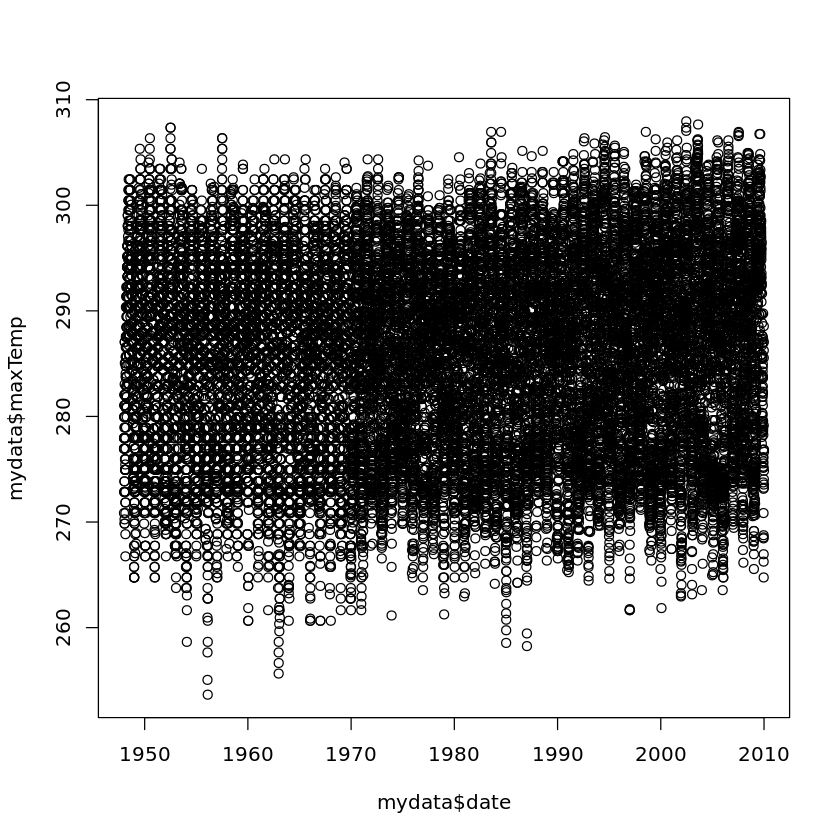

In [18]:
mydata$date = as.Date(mydata$date)
plot (mydata$date, mydata$maxTemp)

Die Werte scheinen plausibel, aber schön sieht das derzeit nicht aus. Wir versuchen es also nocheinmal und geben der plot() Funktion nun ein paar Informationen mehr mit, z.B. 

1) dass wir nur Linien, keine Punkte darstellen wollen (type="l"), 

2) dass wir gerne eine rote Linie hätten (col="red") und 

3) dass wir die Beschriftung der Achsen gerne selbst übernehmen (ann=FALSE).

Weitere Optionen für die Darsttellung der Daten (type=""):

type=”l” --> nur Linien / type=”p” --> nur Punkte / type=”b” --> beides / type="h" --> vertikale Linien = Balken / type="n" --> nichts

Weiter Farboptionen (col=""):

"red" / "blue" / "black" / ...

Einen schönen Überblick über die in R standardmäßig (es gibt viele Erweiterungspakete) verfügbaren Farben findet Ihr unter: http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf

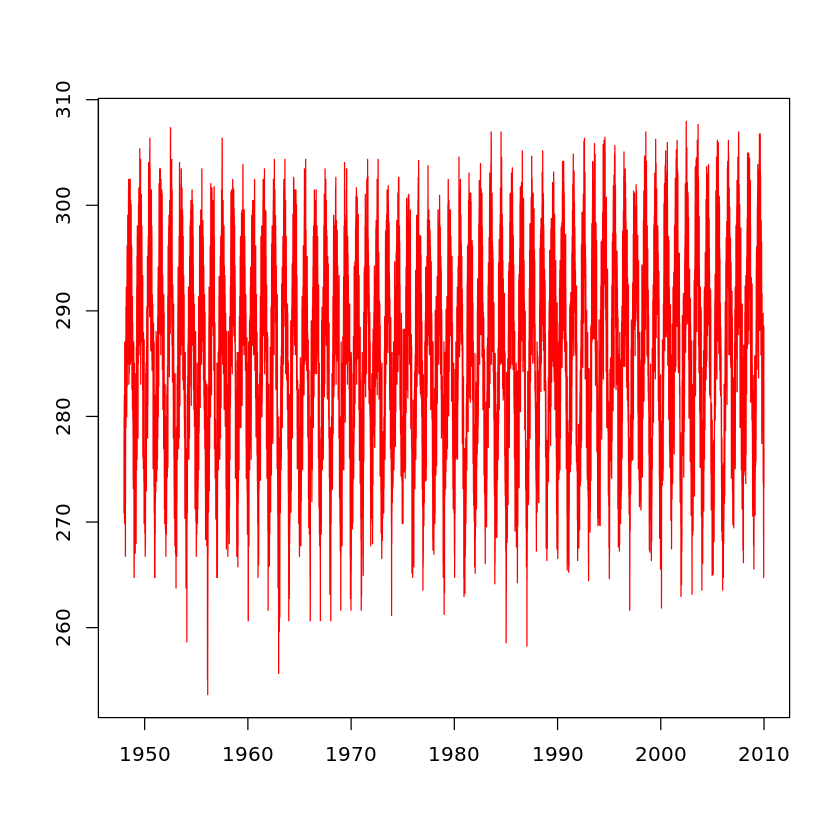

In [19]:
plot (mydata$date, mydata$maxTemp, type="l", col="red", ann=FALSE)

Nun wollen wir als zweite Zeitreihe die Minimaltemperatur (mydata$minTemp), einen Titel, Beschriftungen für die X- und Y-Achse sowie eine Legende hinzufügen. Wir verwenden das Attribut "lty" um den Linetype (Linientyp) zu definieren. Wir geben der Maximaltemperatur den Stil "twodash" (--) und der Minimaltempertur den Stil "dottet" (..). Beachtet, dass wir die Linientypen auch in der Legende angeben müssen, die Angaben erfolgen hier in Form eines Vektors ("c()") mit den beiden Linientypen.

Tipps: 

1) Für die Legende gibt es verschiedene Platzierungsoptionen:
"bottomright", "bottom", "bottomleft", "left", "topleft", "top", "topright", "right" and "center"

2) Durch Angabe eines Versatzes (inset="") in Prozent des Achsenbereichs sorgt man dafür, dass die Legende schön positioniert ist!

3) Unterschiedliche Linientypen (lty=""):

twodash / longdash / dotdash / dotted / dashed / solid / blank

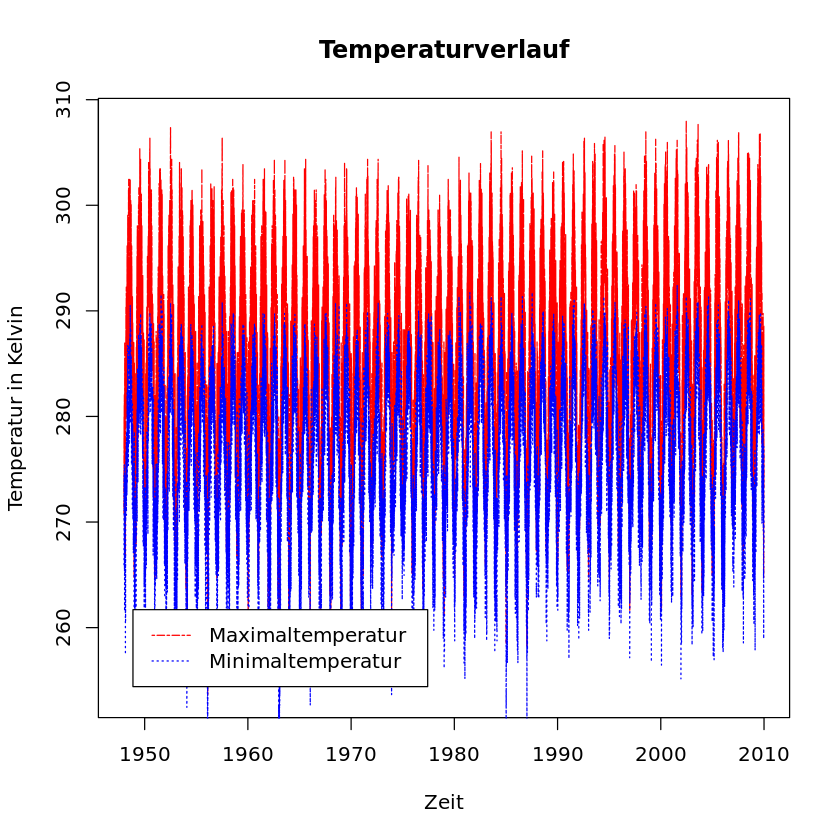

In [20]:
plot (mydata$date, mydata$maxTemp, type="l", col="red", ann=FALSE, lty="twodash")
lines(mydata$date, mydata$minTemp, type="l", col="blue", lty="dotted")
title(main="Temperaturverlauf")
title(xlab="Zeit")
title(ylab="Temperatur in Kelvin")
legend("bottomleft", inset=.05, c("Maximaltemperatur", "Minimaltemperatur"), col =c("red", "blue"), lty=c("twodash", "dotted"))

Wir wollen nun noch den Niederschlag als Balkendiagramm in blau plotten - wir tun dies unter Verwednung des Darstellungstypes "h" (type="h").

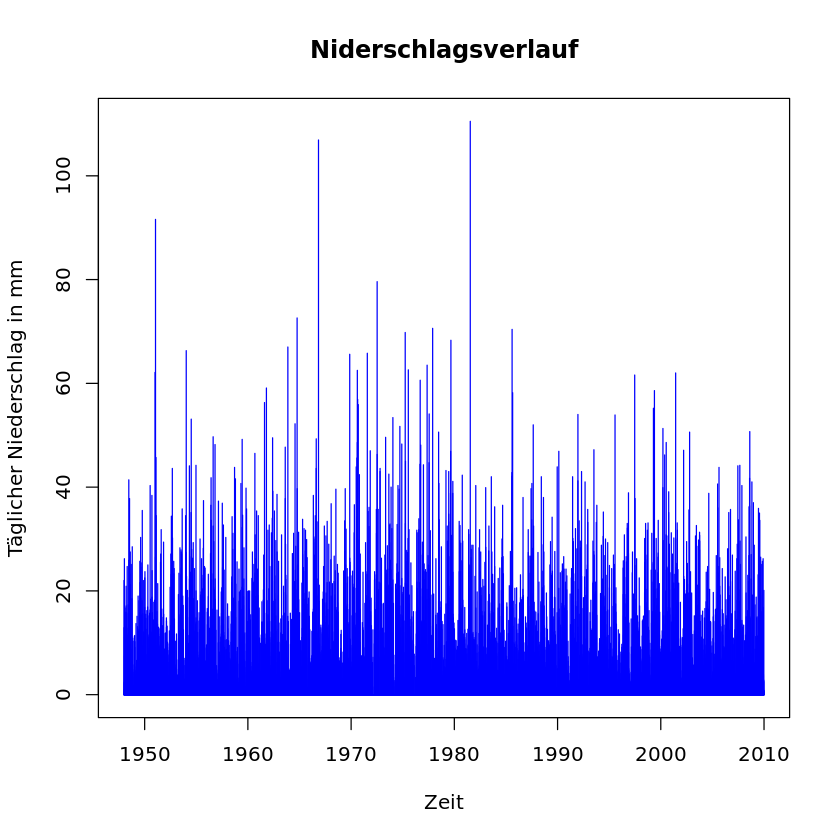

In [21]:
plot(mydata$date, mydata$precip,type="h",col="blue",ann=FALSE)
title (main="Niderschlagsverlauf")
title (xlab ="Zeit")
title (ylab ="Täglicher Niederschlag in mm")


Wir wollen nun einen Dichteplot erzeugen, der uns zeigt, wie die Maximaltemperatur über den Wertebereich verteilt ist. Hierzu verwenden wir erneut "plot", berechnen uns aber zunächst die Dichteverteilung (d_maxTemp), die wir einfach einmal ausgeben um uns die Berechnungen einmal anzusehen:

In [22]:
d_maxTemp = density (mydata$maxTemp)
d_maxTemp


Call:
	density.default(x = mydata$maxTemp)

Data: mydata$maxTemp (22646 obs.);	Bandwidth 'bw' = 1.135

       x               y            
 Min.   :250.2   Min.   :1.800e-07  
 1st Qu.:265.5   1st Qu.:6.498e-04  
 Median :280.8   Median :1.458e-02  
 Mean   :280.8   Mean   :1.635e-02  
 3rd Qu.:296.1   3rd Qu.:3.047e-02  
 Max.   :311.4   Max.   :3.926e-02  

Nun wollen wir uns die berechnete Dichtefunktion (d_maxTemp) im Plot durch eine rote Linie (col="red") darstellen, wieder wollen wir Titel und Achsenbeschriftung selbst definieren (ann=FALSE).

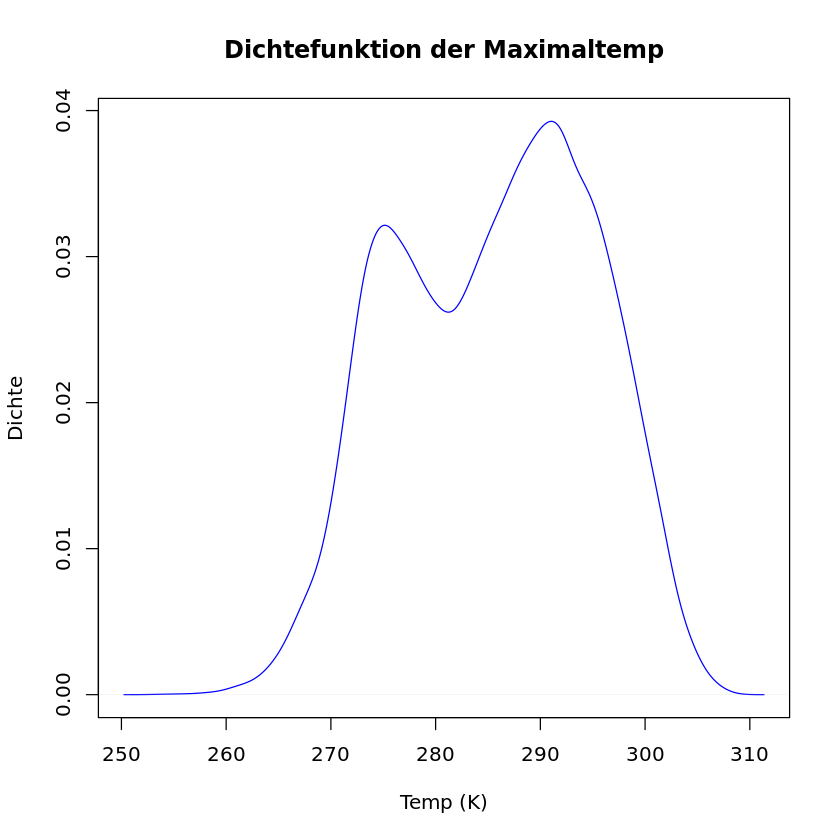

In [23]:
plot (d_maxTemp, col="blue",ann=FALSE)
title (main="Dichtefunktion der Maximaltemp")
title (xlab ="Temp (K)")
title (ylab ="Dichte")


Wir fügen nun auch die Minimaltemperatur hinzu, diesmal in blau! Natürlich müssen wir den Titel auch ändern...

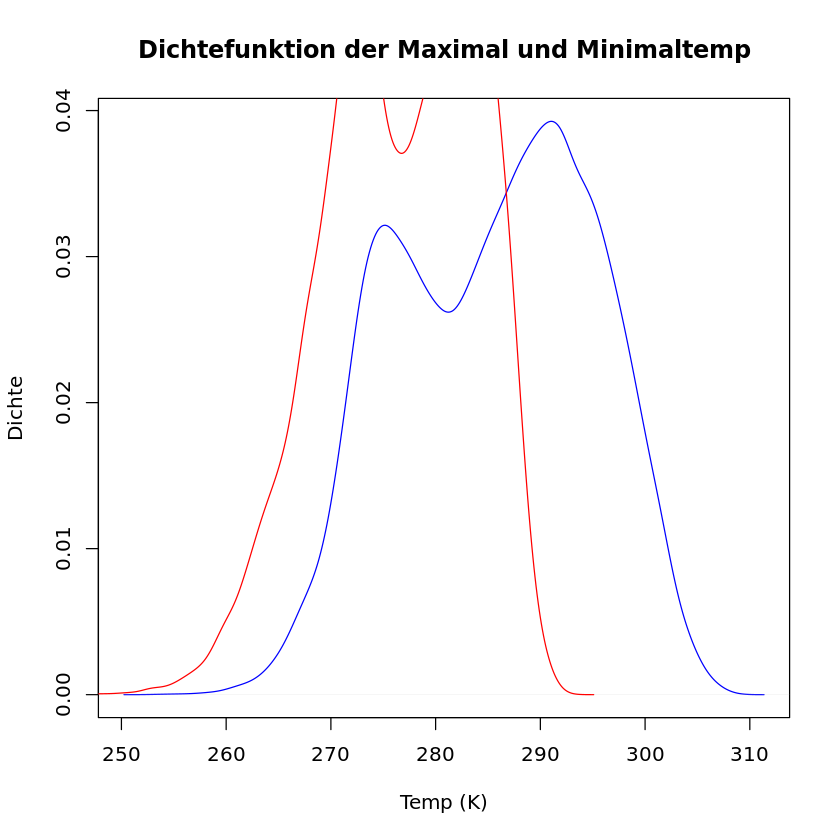

In [24]:
plot (d_maxTemp, col="blue",ann=FALSE)
d_minTemp = density (mydata$minTemp)
lines(d_minTemp, col ="red")

title (main="Dichtefunktion der Maximal und Minimaltemp")
title (xlab ="Temp (K)")
title (ylab ="Dichte")


Hoppala, da ist die zweite Linie wohl etwas über das Ziel heraus geschossen. Also versuchen wir es nochmal, diesmal begrenzen wir die X- und Y-Achse durch die Argumete "xlim" und "ylim". Die Angaben erfolgen hier in Form eines Vektors "c()" mit den Minimal- und Maximawerten. Auch eine Legende fügen wir hinzu...

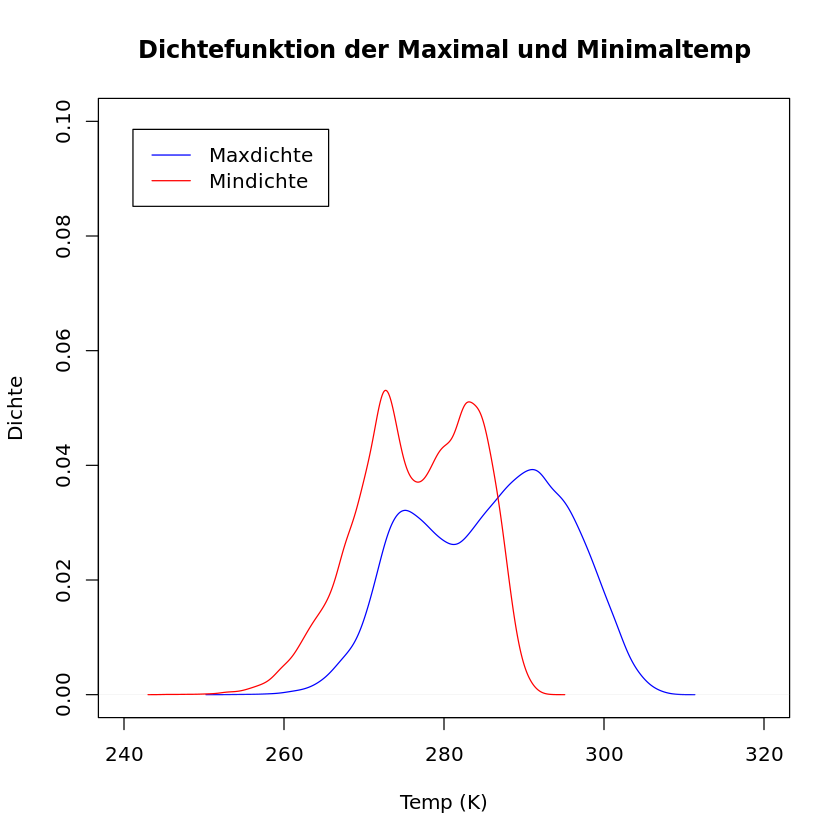

In [25]:
plot (d_maxTemp, xlim=c(240,320), ylim=c(0, 0.1), col="blue",ann=FALSE) #damit man eigene Beschriftungen einfügen kann
d_minTemp = density (mydata$minTemp)
lines(d_minTemp, col ="red")

title (main="Dichtefunktion der Maximal und Minimaltemp")
title (xlab ="Temp (K)")
title (ylab ="Dichte")
legend("topleft", inset=.05, c("Maxdichte", "Mindichte"), col =c("blue", "red"), lty=c("solid","solid"))

## Zeiträume aus den Daten auswählen

Manchmal will man nur mit einem Zeitbereich einer Datenreihe arbeiten. Dann kann man auch Zeiträume wählen und am besten einer anderen Variablen zuordnen - so verlieren wir nicht unsere ursprünglichen Daten. Wir wählen zum Test nur 5 Tage und weisen die entsprechenden Werte der Variable "mydata_selection" zu. Danach geben wir uns die Werte durch Eingabe des Variablennamens aus.

Aber was macht eigentlich dieses einzelne Komma in der eckigen Klammer?
--> Der Zugriff auf Daten in einem Dataframe erfolgt über die Zeilen und Spalten in eckigen Klammern, z.B. mydata[ZeileX:ZeileY, SpalteX:SpalteY]. Hier definieren wir den Zeilenbereich über einen Datumsbereich, den Spaltenbereich nach dem Komma definieren wir nicht weiter, d.h. uns interessieren alle Spalten!

In [26]:
mydata_selection1 = mydata[mydata$date>="2000-01-01" & mydata$date<="2000-01-05",]
mydata_selection1

,date,minTemp,maxTemp,precip
18994,2000-01-01,267.15,271.15,5.5
18995,2000-01-02,269.15,273.15,0.0
18996,2000-01-03,265.75,269.85,0.0
18997,2000-01-04,264.25,269.35,0.0
18998,2000-01-05,266.95,274.15,0.0


Ich kann auch über den Zeilen- bzw. Spaltenindex aus meinen Daten auswählen - wir wählen die Zeilen 18994-18998 (entspricht dem vorher gewählten Datumsbereich), definieren nun aber in der Spaltendimension nach dem Komma, dass uns nur die Spalten 1-3 interessieren! 

In [27]:
mydata_selection2 = mydata[18994:18998,3:4]
mydata_selection2

,maxTemp,precip
18994,271.15,5.5
18995,273.15,0.0
18996,269.85,0.0
18997,269.35,0.0
18998,274.15,0.0


Ich kann die Splaten auch bei Ihrem Namen ansprechen und so eine Auswahl treffen, z.B. indem ich nur die Spalten "date" und "precip" in einem Vektor "c()" angebe!

In [28]:
mydata_selection3 = mydata [18994:18999,c("date", "precip")]
mydata_selection3

,date,precip
18994,2000-01-01,5.5
18995,2000-01-02,0.0
18996,2000-01-03,0.0
18997,2000-01-04,0.0
18998,2000-01-05,0.0
18999,2000-01-06,0.0


Die eben demonstrierten Optionen zur Auswahl sind natürlich beliebig kombinierbar!

## Daten monatsweise oder jährlich zusammenfassen

Will man sich eine tägliche Zeitreihe auf Monats oder Jahresbasis ansehen, so ist es erforderlich diese entsprechend zusammenzufassen (= zu aggregieren). Dies ist am leichtesten und übersichtlichsten, wenn man zunächst in der Zeitreihe eine Spalte anlegt, die das Kriterium enthält anhand dessen zusammengefasst werden soll (z.B. nur den Monat, nur das Jahr, Jahr&Monat,...)!

Um die Temperatur auf Monatsbasis zusammenzufassen weisen wir zunächst einer neuen Spalte "ym" in "mydata" nur die Jahres- und Monatsinformation unserer ursprünglichen Datumsspalte (mydata$date) zu - diese Information wird das Kriterium unserer Aggregierung. Den Header unseres Ergebnisis geben wir uns zur Kontrolle aus. 

Wir nehmen wieder zur Kenntniss, dass sich Not-A-Number (NaN) Werte in der Zeitreihe befinden.

In [31]:
mydata$ym = format(mydata$date, "%Y-%m")
head (mydata, n=10)
mydata$y = format(mydata$date, "%Y")
head (mydata, n=10)

date,minTemp,maxTemp,precip,ym
1948-01-01,265.95,270.85,NaN,1948-01
1948-01-02,269.05,276.95,22.0,1948-01
1948-01-03,274.45,277.95,12.9,1948-01
1948-01-04,271.25,276.95,0.0,1948-01
1948-01-05,271.05,279.95,0.9,1948-01
1948-01-06,271.85,276.95,0.0,1948-01
1948-01-07,271.85,277.95,0.2,1948-01
1948-01-08,271.25,277.95,2.4,1948-01
1948-01-09,267.85,272.85,0.0,1948-01
1948-01-10,267.85,281.05,0.0,1948-01


date,minTemp,maxTemp,precip,ym,y
1948-01-01,265.95,270.85,NaN,1948-01,1948
1948-01-02,269.05,276.95,22.0,1948-01,1948
1948-01-03,274.45,277.95,12.9,1948-01,1948
1948-01-04,271.25,276.95,0.0,1948-01,1948
1948-01-05,271.05,279.95,0.9,1948-01,1948
1948-01-06,271.85,276.95,0.0,1948-01,1948
1948-01-07,271.85,277.95,0.2,1948-01,1948
1948-01-08,271.25,277.95,2.4,1948-01,1948
1948-01-09,267.85,272.85,0.0,1948-01,1948
1948-01-10,267.85,281.05,0.0,1948-01,1948


Wir wollen nun einzelne Spalten auf Monatsbasis zusammenfassen. Je nach der betrachteten Größe müssen wir dafür natürlich den Mittelwert (FUN=mean), die Summe (FUN=sum) oder vielleicht sogar den Minimal- (FUN=min) oder Maximalwert (FUN=max) berechnen. In jedem Fall entfernen wir aber immer gleich die Fehlwerte (na.rm=TRUE). 

Wir fassen zunächst die Maximaltempertur zu Monatswerten zusammen, dabei nehmen wir immer den höchsten Wert (FUN=max). Das Ergebnis zeigen wir uns mit "head()" an:

In [33]:
maxTemp_monthly = aggregate (maxTemp ~ ym, data=mydata, FUN=max, na.rm=TRUE)#alles rausschmeisen, was keinen Zahlenwert hat
head (maxTemp_monthly, n=10)

ym,maxTemp
1948-01,287.05
1948-02,285.05
1948-03,292.25
1948-04,296.15
1948-05,299.05
1948-06,302.45
1948-07,302.45
1948-08,302.45
1948-09,300.05
1948-10,294.25


Achtung, die Spalte "ym" ist zunächst wieder nicht als Datum formatiert, sondern als Character (=Zeichenfolge). Das können wir mit "str(maxTemp_monthly)" beweisen - allerdings stört uns das an dieser Stelle gerade nicht!

In [35]:
str(maxTemp_monthly)

'data.frame':	744 obs. of  2 variables:
 $ ym     : chr  "1948-01" "1948-02" "1948-03" "1948-04" ...
 $ maxTemp: num  287 285 292 296 299 ...


Nun wollen wir Jahrewerte bilden. Das machen wir ähnlich wie für die Monatsmittel, nur legen wir diesmal in "mydata" eine Spalte "y" an und verwenden als Aggregierungsmethode wieder das Maximum der Reihe ("FUN=max").

In [37]:
maxTemp_yearly = aggregate (maxTemp ~ y, data=mydata, FUN=max, na.rm=TRUE)#alles rausschmeisen, was keinen Zahlenwert hat
head (maxTemp_yearly, n=10)

y,maxTemp
1948,302.45
1949,305.35
1950,306.35
1951,303.45
1952,307.35
1953,304.05
1954,301.45
1955,303.45
1956,302.05
1957,306.35


Achtung, die Spalte "y" ist zunächst wieder nicht als Datum formatiert, sondern als Character (=Zeichenfolge) - auch hier stört uns das gerade nicht!

Die eben berechneten jährlichen Temperaturmaxima wollen wir wieder plotten: 

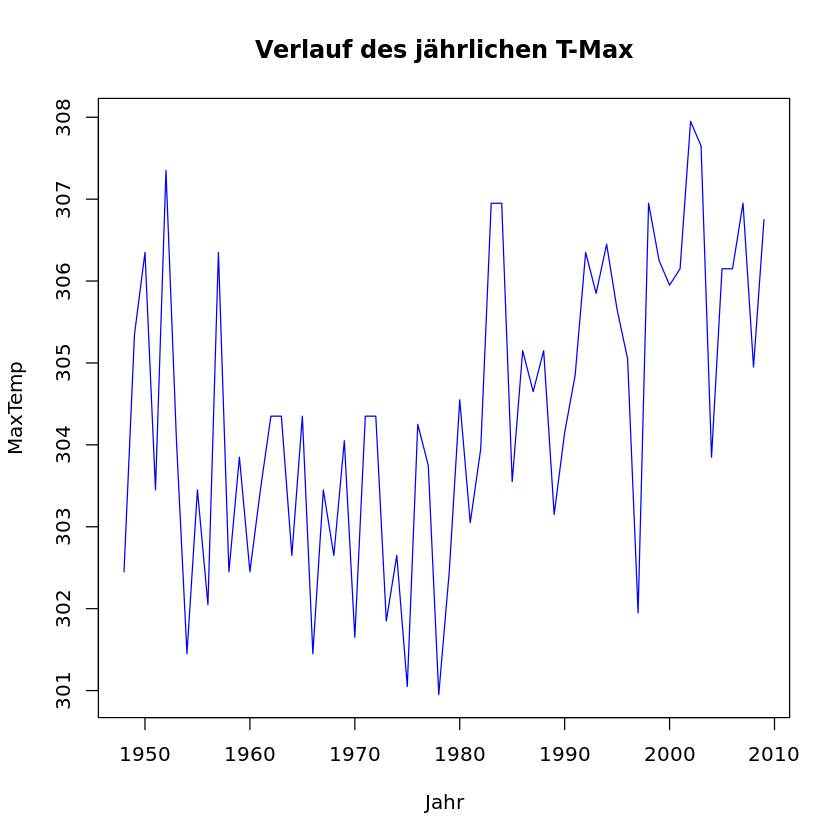

In [39]:
plot (maxTemp_yearly$y, maxTemp_yearly$maxTemp, type="l", col="blue",ann=FALSE) #damit man eigene Beschriftungen einfügen kann


title (main="Verlauf des jährlichen T-Max")
title (xlab ="Jahr")
title (ylab ="MaxTemp")


Etwas komplizierter wird es wenn wir für die 12 Monate des Jahres einen mittleren Wert einer mehrjährigen Zeitreihe bilden wollen. Ganz besonders im Fall des Niederschlags, hier müssen wir eigentlich zunächst über die Jahr- und Monatsinformation per Summe aggregieren (das gibt für jeden Monat und die unterschiedichen Jahre eine Niederschlagssumme) und dann nochmal nur unter Verwendung der Monatsinformation und die Mittelwertbildung einen mittleren monatlichen Niederschlag für die Zeitreihe berechnen.

Wir wollen genau das nun tun, nutzen wieder die Funktion "aggregate()", diesmal aber die kombinierte Betrachtung zweier Spalten. Zunächst legen wir in der ursprünglichen Datenreihe zwei neue Spalten an, eine mit nur dem Jahr und eine mit nur dem Monat.

Wir erstellen dann eine Reihe "precip_monthly" der wir die unter Berücksichtung der Jahres- und Monatsinformation summierten Niederschlagsdaten zuweisen - das liefert und für die Monate in den einzelnen Jahren die Summe, aber mittelt aber noch nicht über die Jahre.

Wir erstellen nun eine weitere Variale "precip_twelvemonths" der wir unter Verwendung der Ergebnisse aus "precip_monthly" nun die Mittelwerte über die Monate (ungeachtet des Jahres) zuweisen - das liefert uns die mittleren monatlichen Niederschlagssummen.

In [42]:
mydata$y = format(mydata$date, "%Y")
mydata$m = format(mydata$date, "%m")

precip_monthly = aggregate(precip ~ y+m, data=mydata, FUN=sum, na.rm=TRUE)
precip_twelvemonths = aggregate(precip ~m, data=precip_monthly, FUN=mean, na.rm=TRUE)

head(precip_monthly, n=20)
head(precip_twelvemonths, n=20)

y,m,precip
1948,01,107.8
1949,01,75.8
1950,01,94.7
1951,01,268.6
1952,01,74.3
1953,01,25.0
1954,01,159.1
1955,01,17.3
1956,01,51.9
1957,01,35.2


m,precip
01,59.55323
02,49.69032
03,58.86774
04,77.81290
05,93.04516
06,130.20161
07,154.47742
08,144.76935
09,93.89194
10,74.54355


Schauen wir uns das Ergebniss mal an, indem wir nur den Variablen Namen eingeben und ausführen:

Die hier erhaltenen Monatswerte stellen wir nun als Balkendiagramm in blau dar. Verwendet dabei das Argument "lwd=" um die Dicke Eurer Balken anzupassen:

Tipp:

Die Farbe kann wie gewohnt einfach unter Angabe einer Farbe gesetz werden (col="blue") oder über einen RGB Wert definiert werden:

col=rgb(0,0,0,alpha=0.3)

Diese Option bietet auch die Möglichkeit einen Transparenzwert "alpha" zu definieren, allerdings ist aufzupassen, da RGB Werte in der Regel einen Bereich von 0-255 haben, hier aber eine Intensität von 0-1 eingesetzt werden muss! Man muss die RGB-Werte falls im 0-255er Wertebereich vorliegend, also normieren, d.h. durch den Maximalwert teilen:

Für die Farbe blau heisst das: rgb(0,0,255) --> rgb(0/255,0/255,255/255)
Eine Übersicht über verschiedene Farben und deren RGB Werte findet Ihr unter http://www.farb-tabelle.de/de/farbtabelle.htm!

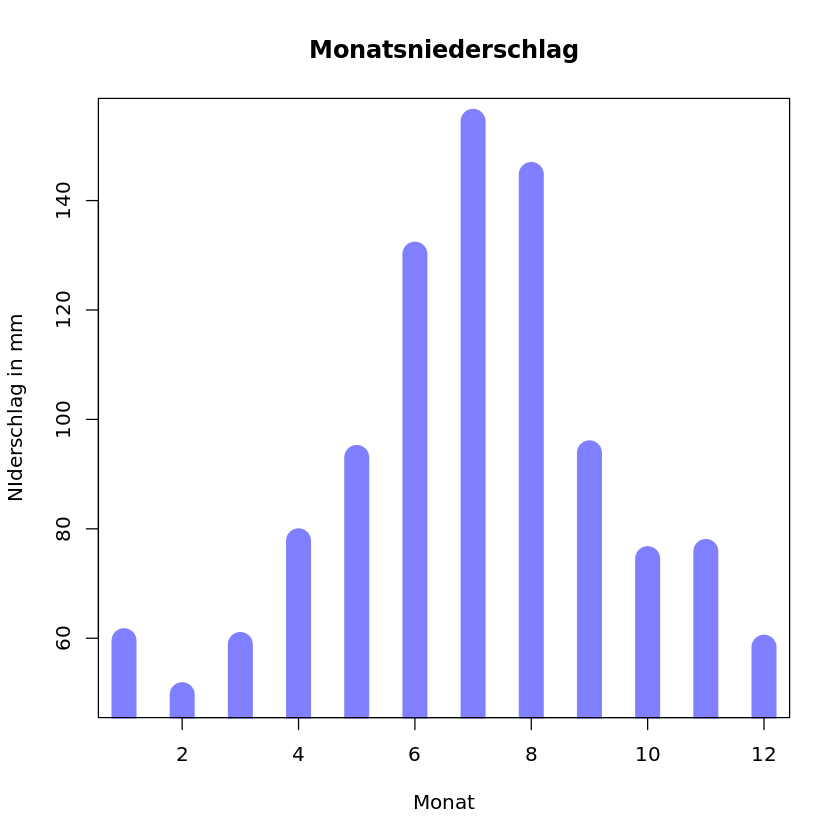

In [46]:
plot(precip_twelvemonths$m, precip_twelvemonths$precip, type="h", col=rgb(0/255,0/255,255/255, alpha=0.5), ann=FALSE, lwd=20)
title(main="Monatsniederschlag")
title(xlab="Monat")
title(ylab="NIderschlag in mm")


Für die Temperatur geht es aufgrund der Mittelwertsbildung über Monate und Jahre hinweg einfacher. Wir können hier direkt auf monatlicher Basis mitteln ohne uns um die Jahre zu scheren - wir definieren hierzu eine Variable "maxTemp_twelvemonths" und übergeben Ihr die über die in den ursprünglichen Daten angelegte Spalte mit nur den Monatswerten den Mittelwert aller Tage in einem bestimmten Monat, wieder geben wir das Ergebnis aus:

In [47]:
maxTemp_twelvemonths = aggregate(maxTemp ~ m, data=mydata, FUN=mean, na.rm=TRUE)
maxTemp_twelvemonths

m,maxTemp
01,273.5133
02,276.8676
03,282.0471
04,286.9288
05,291.9143
06,294.2449
07,295.9131
08,295.1501
09,291.4428
10,286.3379


Wir wollen nun auch die Monatsmittel der Temperaturmaxima plotten. Wir erstellen ein Diagramm, stellen dabei auf Punktsymbol und Linie um (type="b"), passen die Linienstärke (lwd=) an und fügen zur Übung auch noch ein ausgwähltes Punktsymbol ein (pch=21).

Wir speichern die Graphik in unser Arbeitsverzeichnis, indem wir nach dem Plot noch die Befehle 

"dev.copy(png,'NameDerDatei.png')"

"dev.off()"

anhängen!

Tipp:

1) Eine Übersicht über verfügbare Symbole findest Du unter: https://www.statmethods.net/advgraphs/images/points.png

2) Solange wir im Jupyter arbeiten, könnt Ihr die generierten Grafiken auch mit "Rechtsklick --> Speichern unter ..." im Browser speichern!

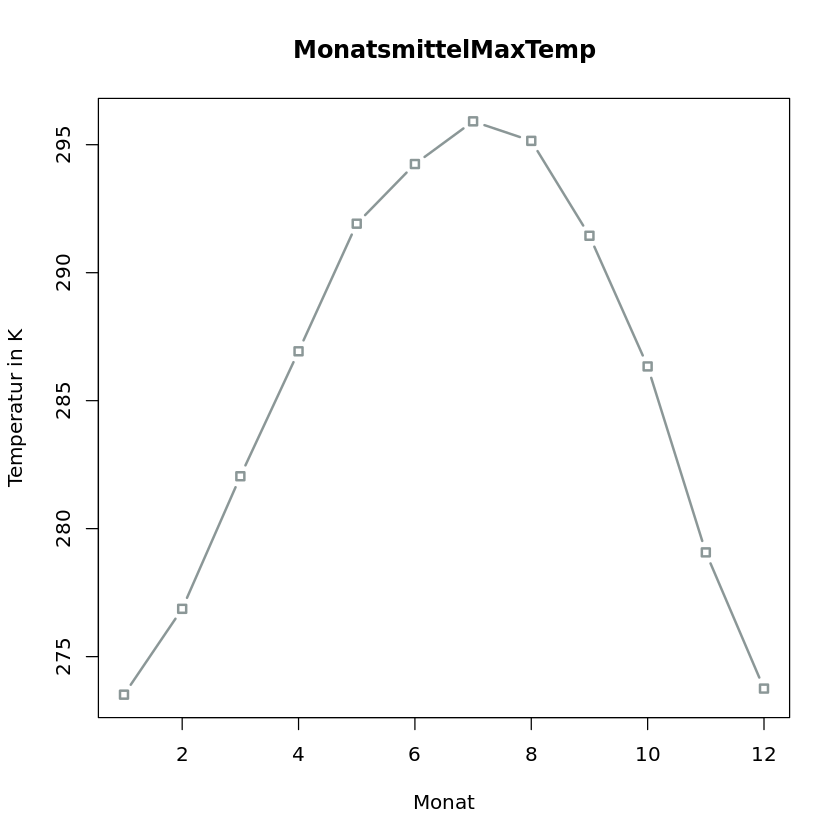

In [56]:
plot(maxTemp_twelvemonths$m, maxTemp_twelvemonths$maxTemp, type="b", col=rgb(25/255,48/255,48/255, alpha=0.5), ann=FALSE, lwd=2, pch=22)
title(main="MonatsmittelMaxTemp")
title(xlab="Monat")
title(ylab="Temperatur in K")

## Lineare Regression

Zur linearen Regression: 
Die lineare Regression versucht einen Y-Wert in linearer Abhängigkeit eines X-Wertes zu berechnen. Heraus kommt eine Regressionsfunktion: y = Achsenabschnitt + Steigung * x = b + m * x

Wir wollen nun einmal untersuchen, ob es hier in den Maximaltemperaturen vielleicht einen linearen Trend gibt. Dafür verwenden wir die Funktion "lm" (linear model) und übergeben dieser zunächst den Y-Wert (die Maximaltemperatur) und dann den X-Wert (das Jahr). Die Ergebnisse schreiben wir in die Variable "fit_maxTemp"!

Zuvor müssen wir unsere Jahresinformation aber wieder in eine Zahl (wir erinnern uns, die Zusammenfassung hat eine Zechenfolge daraus gemacht) umwandeln. Das machen wir mit der Funktion "as.numeric()".

In [57]:
maxTemp_yearly$y= as.numeric(maxTemp_yearly$y)
fit_maxTemp = lm(maxTemp_yearly$maxTemp ~ maxTemp_yearly$y)

Durch diesen Aufruf haben wir eine Variable "fit_maxTemp" definiert, die alle Information zur berechneten Regression enthält. Die Koeffizienten (Achsenabschnitt (= Intercept) und die Steigung (hier: maxTemp_year$date)) kann man sich über Aufruf von "coefficients()" und Angabe der Regressionsfunktion ("fit_maxTemp") ausgeben lassen:

In [60]:
coefficients(fit_maxTemp)

(Intercept) maxTemp_yearly$y 
    209.86215532       0.04777769

Will man sich gleich die gesamte Zusammenfassung der Linearen Regression ansehen, verwendet man die Funktion "summary()" unter Angabe der Regressionsfunktion ("fit_maxTemp").

Ausgeben werden dann 1) unter "Call" die verwendete Funktion, 2) die Statistik der Abweichungen (Residuen) unter "Residuals", 3) die Regressionskoeffizienten (Achsenabschnitt = Intercept und die Steigung) zusammen mit den Ergebnissen des Signifikanztests unter "Coefficients", sowie 4) der Standardfehler, das R2 und die F-Statistik.

Aber was heisst "Signifikanz" eigentlich: Der hier verwendete Signifikanztest testet die Regressionskoeffizienten gegen "0". Er testet also, mit welcher Wahrscheinlichkeit ich richtig liege dass z.B. die Steigung ungleich "0" ist, also eine deutliche Zu- oder Abnahme vorliegt.

In [61]:
summary(fit_maxTemp)


Call:
lm(formula = maxTemp_yearly$maxTemp ~ maxTemp_yearly$y)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4164 -1.0542  0.1480  0.7622  4.2258 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      209.86216   22.58346   9.293 3.19e-13 ***
maxTemp_yearly$y   0.04778    0.01141   4.186 9.43e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.608 on 60 degrees of freedom
Multiple R-squared:  0.226,	Adjusted R-squared:  0.2131 
F-statistic: 17.52 on 1 and 60 DF,  p-value: 9.428e-05


Die in Abhängigkeit des Jahres berechneten Regressionswerte kann man sich über "fitted.values" und Angabe der Regressionsfunktion ("fit_maxTemp") ausgeben lassen:

In [62]:
fitted.values(fit_maxTemp)

1        2        3        4        5        6        7        8 
302.9331 302.9809 303.0287 303.0764 303.1242 303.1720 303.2198 303.2675 
       9       10       11       12       13       14       15       16 
303.3153 303.3631 303.4109 303.4587 303.5064 303.5542 303.6020 303.6498 
      17       18       19       20       21       22       23       24 
303.6975 303.7453 303.7931 303.8409 303.8887 303.9364 303.9842 304.0320 
      25       26       27       28       29       30       31       32 
304.0798 304.1275 304.1753 304.2231 304.2709 304.3187 304.3664 304.4142 
      33       34       35       36       37       38       39       40 
304.4620 304.5098 304.5575 304.6053 304.6531 304.7009 304.7487 304.7964 
      41       42       43       44       45       46       47       48 
304.8442 304.8920 304.9398 304.9875 305.0353 305.0831 305.1309 305.1787 
      49       50       51       52       53       54       55       56 
305.2264 305.2742 305.3220 305.3698 305.4175 305.4653 305.5131 305.5609 
      57       58       59       60       61       62 
305.6087 305.6564 305.7042 305.7520 305.7998 305.8475

Die Abweichungen (=Residuen) der tatsächlichen Temperaturwerte von den über das jeweilige Jahr berechneten kann man sich über "residuals" und Angabe der Regressionsfunktion ("fit_maxTemp") ausgeben lassen:

In [63]:
residuals(fit_maxTemp)

1           2           3           4           5           6 
-0.48310292  2.36911939  3.32134169  0.37356400  4.22578631  0.87800861 
          7           8           9          10          11          12 
-1.76976908  0.18245322 -1.26532447  2.98689784 -0.96087986  0.39134245 
         13          14          15          16          17          18 
-1.05643524 -0.10421294  0.74800937  0.70023167 -1.04754602  0.60467629 
         19          20          21          22          23          24 
-2.34310141 -0.39087910 -1.23865680  0.11356551 -2.33421218  0.31801012 
         25          26          27          28          29          30 
 0.27023243 -2.27754526 -1.52532296 -3.17310065 -0.02087835 -0.56865604 
         31          32          33          34          35          36 
-3.41643373 -1.96421143  0.08801088 -1.45976682 -0.60754451  2.34467780 
         37          38          39          40          41          42 
 2.29690010 -1.15087759  0.40134472 -0.14643298  0.30578933 -1.74198837 
         43          44          45          46          47          48 
-0.78976606 -0.13754375  1.31467855  0.76690086  1.31912316  0.47134547 
         49          50          51          52          53          54 
-0.17643222 -3.32420992  1.62801239  0.88023470  0.53245700  0.68467931 
         55          56          57          58          59          60 
 2.43690161  2.08912392 -1.75865377  0.49356853  0.44579084  1.19801314 
         61          62 
-0.84976455  0.90245776

Wir fügen unserem Datensatz nun eine neue Spalte hinzu, die wir maxTemp_calculated benennen ("maxTemp_year$maxTemp_calculated") und weisen dieser Spalte die über die Regression berechneten Werte zu:

In [64]:
maxTemp_yearly$maxTemp_calculated = fitted.values(fit_maxTemp)

Durch Anzeigen des Headers sehen wir nach was hier passiert ist:

In [65]:
head(maxTemp_yearly, n=10)

y,maxTemp,maxTemp_calculated
1948,302.45,302.9331
1949,305.35,302.9809
1950,306.35,303.0287
1951,303.45,303.0764
1952,307.35,303.1242
1953,304.05,303.1720
1954,301.45,303.2198
1955,303.45,303.2675
1956,302.05,303.3153
1957,306.35,303.3631


Nun wollen wir die Temperaturdaten inklusive des Trendes als Plot darstellen! Zusätzlich wollen wir die berechnete Regressiongleichung als Text in den Plot einfügen. 

1) Dazu müssen wir zunächst durch Zuhilfenahme der Funktion "round(Variable,Dezimalstellen)" die in der Variable "coefficients(fit_maxTemp)" gespeicherten Regressionskoeffizienten auf zwei Stellen hinter dem Komma runden. 

2) Danach basteln wir uns eine Textvariable "regress_function" in die wir mit der Funktion "paste()" nacheinander Textbausteine und Variablen einbauen.

3) Unter verwendung der Funktion "text(x-Position, y-Position, "mein Text")" fügen wir die generierte Zeichenfolge in das Diagramm ein.

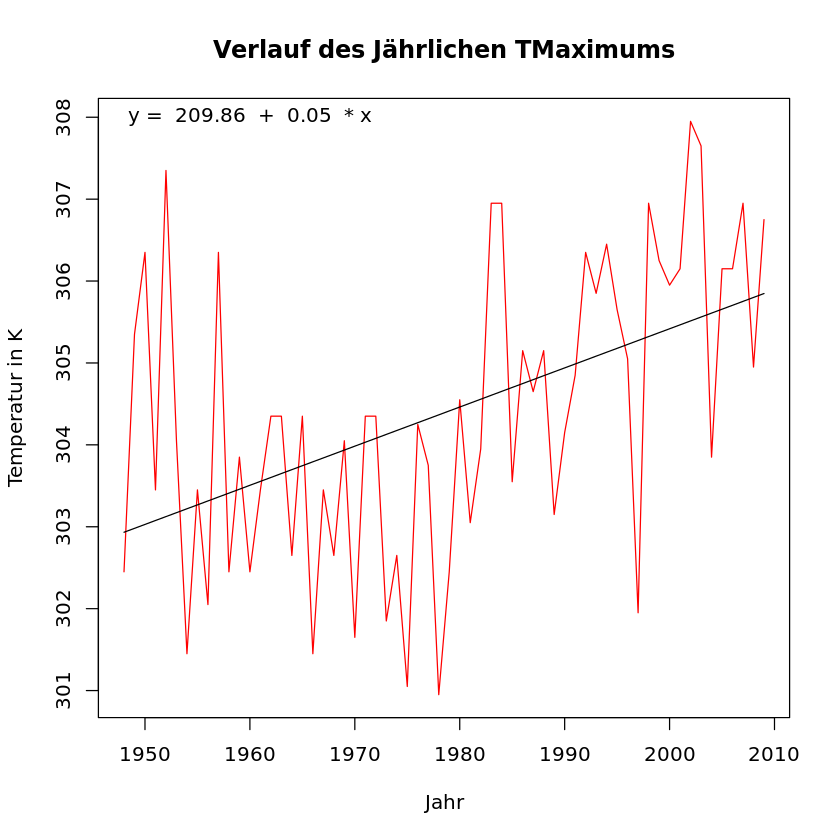

In [72]:
plot(maxTemp_yearly$y, maxTemp_yearly$maxTemp, type="l", col="red", ann=FALSE)
lines(maxTemp_yearly$y, maxTemp_yearly$maxTemp_calculated, type="l", col="black")
title(main="Verlauf des Jährlichen TMaximums")
title(xlab="Jahr", ylab="Temperatur in K")

slope= round(coefficients(fit_maxTemp)[2],2)
intercept= round(coefficients(fit_maxTemp)[1], 2)
#Runden der Zahlen
regress_function = paste("y = ", intercept, " + ", slope, " * x")
text(1960, 308, regress_function)

Was können wir aus unserer Trendanalyse folgern? Nun die Regressionslinie zeigt eine Zunahme der jährlichen Maximaltemperatur über den gesamten Zeitraum. Die Zusammenfassung der Regressionsberechnungen hat uns geliefert, dass die Steigung unserer Regressionsgeraden mit 3 Sternen mit einer Wahrscheinlichkeit von > 0.999 (entspricht 99.9%) und einer Irrtumswahrscheinlichkeit von < 0.001 (entspricht 0.01%) verschieden von "0" ist - es liegt also ein hochsignifikanter Trend vor.

Nun haben wir eine ganze Menge zur Datenprozessierung mit R gelernt - wir sind fit für die Anwendung des Gelernten in einer Aufgabe!